## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
complete_data = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
complete_data.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659,12.814580,25.662441
std,14.079460,8.894722,1.137974,7.189592,3.921622
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.951474,1.000000,13.000000,27.000000
75%,30.000000,56.292200,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [3]:
# Checking the number of mice.
mouseIDs = complete_data['Mouse ID'].unique()
mouseCount = len(mouseIDs)

In [4]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_df = study_results[study_results.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]

dupIDs = pd.unique(dup_df['Mouse ID'])
dupIDs


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

#x=complete_data.loc(['Mouse ID'])
for i in dupIDs:
    x  = complete_data[complete_data['Mouse ID'] == i]
x

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
for ID in dupIDs:
    clean_data = complete_data[complete_data['Mouse ID'] != ID]


In [7]:
# Checking the number of data points in the clean DataFrame.
dataTotal = len(clean_data)

# Checking the number of mice in the clean DataFrame.
mouseIDs = clean_data['Mouse ID'].unique()
mouseCount = len(mouseIDs)
mouseCount

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumorSummary ={}

tumorVolMeanByDrug = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumorVolMedianByDrug = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumorVolVarByDrug = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumorVolSDByDrug = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumorVolSEMByDrug = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

In [9]:
tumorSummary = pd.DataFrame(tumorVolMeanByDrug)
tumorSummary = pd.merge(tumorSummary, tumorVolMedianByDrug, on='Drug Regimen')
tumorSummary = tumorSummary.rename(columns={'Tumor Volume (mm3)_x':'Mean Tumor Volume',
                                            'Tumor Volume (mm3)_y':'Median Tumor Volume'})

In [10]:
tumorSummary = pd.merge(tumorSummary, tumorVolVarByDrug, on='Drug Regimen')
tumorSummary = pd.merge(tumorSummary, tumorVolSDByDrug, on='Drug Regimen')
tumorSummary = pd.merge(tumorSummary, tumorVolSEMByDrug, on='Drug Regimen')
tumorSummary = tumorSummary.rename(columns={'Tumor Volume (mm3)_x':'Variance of Tumor Volume',
                                            'Tumor Volume (mm3)_y':'Std Dev Tumor Volume',
                                            'Tumor Volume (mm3)':'Std Err Tumor Volume'})
tumorSummary

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Std Dev Tumor Volume,Std Err Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumorSumm = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
tumorSumm

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Total Number of Measurements')

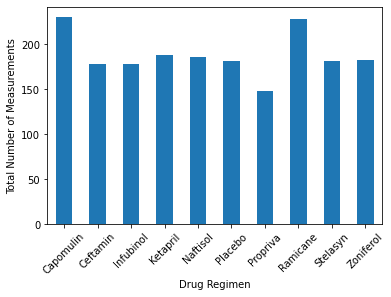

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
totalTmPt = clean_data.groupby('Drug Regimen')['Timepoint'].count()
totalTmPt
tpPandas = totalTmPt.plot.bar(x='Drug Regimen', y='Timepoint', rot=45)
plt.ylabel('Total Number of Measurements')

Text(0, 0.5, 'Total Number of Measurements')

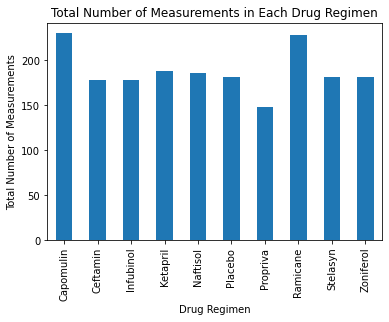

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

tpPyplot = totalTmPt.plot(kind='bar', title='Total Number of Measurements in Each Drug Regimen')
plt.ylabel('Total Number of Measurements')

## Pie Chart

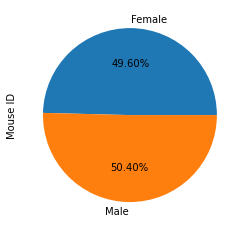

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Delete mice with duplicate IDs from mouse data
for ID in dupIDs:
    clean_MseData = mouse_metadata[mouse_metadata['Mouse ID'] != ID]

# group by 'Sex', count for each sex
groupBySex = clean_MseData.groupby('Sex')['Mouse ID'].count()

sxPd = groupBySex.plot(kind="pie", autopct='%1.2f%%')

In [15]:
groupBySex

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

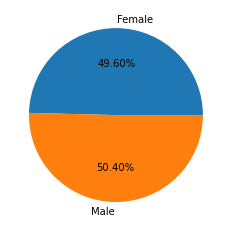

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sxPlt = plt.pie(groupBySex, autopct='%1.2f%%', labels=labels)
plt.show()


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
lastTimePts = clean_data.groupby('Mouse ID')['Timepoint'].max()
lastTimePts

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
finalTumorVol = pd.merge(lastTimePts, clean_data, on=['Mouse ID', 'Timepoint'])
finalTumorVol

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [19]:
# # Create empty lists to fill with tumor vol data (for plotting)
tumorVolData = []

quartiles=[]
lowerQ=[]
upperQ=[]
iqrs=[]
outlierPts=[]

# loop through each drug to pull only mice and their volumes with specified treatments *output: (list of lists)
for tx in drugs:
    
    #tumor volumes for each tx drug regimen
    finalVol = finalTumorVol.loc[finalTumorVol['Drug Regimen'] == tx, 'Tumor Volume (mm3)']
    
    # find upper, lower quartiles, IQR
    quartiles = finalVol.quantile([.25,.5,.75])
    
    LQ = quartiles[.25]
    lowerQ.append(LQ)
    
    UQ = quartiles[.75]
    upperQ.append(UQ)
    
    IQR = (UQ - LQ)
    iqrs.append(IQR) 
    
    # Determine outliers using upper and lower bounds
    lower_bound = LQ - (1.5*IQR)
    upper_bound = UQ + (1.5*IQR)
    
    outlierU = finalVol.loc[finalVol >= upper_bound]# or finalVol <= lower_bound]
    outlierL = finalVol.loc[finalVol <= lower_bound]
    outlierPts.append(outlierU)
    outlierPts.append(outlierL)
    
    # append to tumorVolData list that contains all volumes for all drugs
    tumorVolData.append(finalVol)
   
    # print
    if outlierU.empty and outlierL.empty:
        print(f'There are no potential outliers in tumor volume data for {tx}. ')
    elif outlierU.empty:
        print(f'Potential outliers in the tumor volume data for {tx} are {outlierL} ')
    elif outlierL.empty:
        print(f'Potential outliers in the tumor volume data for {tx} are {outlierU} ')


There are no potential outliers in tumor volume data for Capomulin. 
There are no potential outliers in tumor volume data for Ramicane. 
Potential outliers in the tumor volume data for Infubinol are 31    36.321346
Name: Tumor Volume (mm3), dtype: float64 
There are no potential outliers in tumor volume data for Ceftamin. 


## Box plot

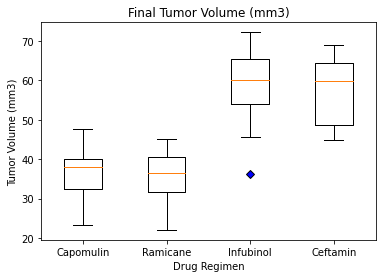

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')

# change look of outlier symbols
blueDiam = dict(markerfacecolor='b', marker='D')

ax1.boxplot(tumorVolData, flierprops=blueDiam)
ax1.set_xticklabels(drugs)

plt.show()



## Line and Scatter Plots

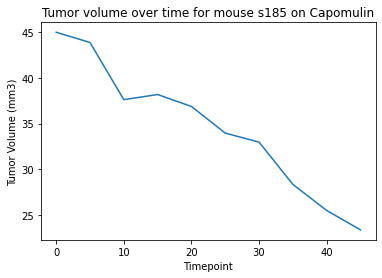

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
m_ID = 's185'

# Pull all data for mouse example
mouseEx = clean_data.loc[clean_data['Mouse ID'] == m_ID]
mouseEx

# Line plot
fig2, ax2 = plt.subplots()
ax2.plot(mouseEx['Timepoint'], mouseEx['Tumor Volume (mm3)'])
ax2.set(xlabel='Timepoint', ylabel='Tumor Volume (mm3)',
       title=f'Tumor volume over time for mouse {m_ID} on Capomulin')
plt.show()

## Scatter Plot

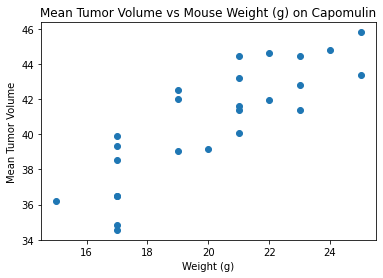

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
drugEx = 'Capomulin'

# Pull all data for drug example Capomulin
drugEx_df = clean_data.loc[clean_data['Drug Regimen'] == drugEx]
drugEx_df

tumorVolMeans = drugEx_df.groupby('Mouse ID').mean()
tumorVolMeans

y_vals = tumorVolMeans['Tumor Volume (mm3)']
x_vals = tumorVolMeans['Weight (g)']

# Plot scatter plot
#fig4, ax4 = plt.subplots()
plt.scatter(x_vals, y_vals)
plt.xlabel('Weight (g)')
plt.ylabel('Mean Tumor Volume')
plt.title (f'Mean Tumor Volume vs Mouse Weight (g) on {drugEx}')
# ax4.set(xlabel='Weight (g)', ylabel='Mean Tumor Volume',
#         title=f'Mean Tumor Volume vs Mouse Weight (g) on {drugEx}')
plt.show()

## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


The r-squared is: 0.7088568047708721
y = 0.95x + 21.55


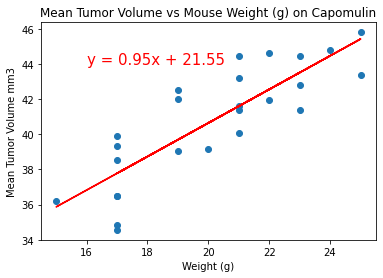

In [24]:
# Print out the r-squared value along with the plot.

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_vals, y_vals)
regress_values = (slope * x_vals) + intercept

eqn = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_vals, y_vals)
plt.plot(x_vals,regress_values,"r-")

plt.annotate(eqn,(16,44),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Mean Tumor Volume mm3')
plt.title (f'Mean Tumor Volume vs Mouse Weight (g) on {drugEx}')
print(f"The r-squared is: {rvalue**2}")
print(eqn)
plt.show()